In [1]:
from scipy import ndimage
import pandas as pd
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [3]:
x1 = genfromtxt('data_magV_1.5.csv', delimiter=',')
x2 = genfromtxt('data_magV_1.6.csv', delimiter=',')
x3 = genfromtxt('data_magV_1.7.csv', delimiter=',')
x4 = genfromtxt('data_magV_1.8.csv', delimiter=',')
x5 = genfromtxt('data_magV_1.9.csv', delimiter=',')
x6 = genfromtxt('data_magV_2.1.csv', delimiter=',')
x7 = genfromtxt('data_magV_2.2.csv', delimiter=',')
x8 = genfromtxt('data_magV_2.3.csv', delimiter=',')
x9 = genfromtxt('data_magV_2.4.csv', delimiter=',')
x10 = genfromtxt('data_magV_2.5.csv', delimiter=',')
x11 = genfromtxt('data_magV_2.6.csv', delimiter=',')
x1 = x1.astype('float32')
x2 = x2.astype('float32')
x3 = x3.astype('float32')
x4 = x4.astype('float32')
x5 = x5.astype('float32')
x6 = x6.astype('float32')
x7 = x7.astype('float32')
x8 = x8.astype('float32')
x9 = x9.astype('float32')
x10 = x10.astype('float32')
x11 = x11.astype('float32')

x_train = np.vstack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))
x_train = np.reshape(x_train, (11, 100, 100, 1))

x_test = genfromtxt('data_magV_2.0.csv', delimiter=',')
x_test = x_test.astype('float32')
x_test = np.reshape(x_test, (1, 100, 100, 1))

In [4]:
input_img = tf.keras.Input(shape=(100, 100, 1))

x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)


x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same',  kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation=None, padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

# 오토인코더 = 인코더 + 디코더
autoencoder = tf.keras.Model(input_img, decoded)

In [5]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 300)     3000      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 300)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 300)       810300    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 300)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 300)       810300

In [6]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                    loss = tf.keras.losses.MeanSquaredError(),
                    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
                            tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                            tf.keras.metrics.RootMeanSquaredError(name="rmse"),
                            tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")])

In [7]:
history = autoencoder.fit(x_train, x_train, epochs=5000, shuffle=True)

Epoch 1/5000
1/1 [==============================] - 4s 4s/step - loss: 57.6298 - mae: 7.1112 - mape: 100.6104 - rmse: 7.4917 - msle: 4.2583
Epoch 2/5000
1/1 [==============================] - 0s 80ms/step - loss: 200.8738 - mae: 13.3897 - mape: 207.1797 - rmse: 14.1214 - msle: 1.0412
Epoch 3/5000
1/1 [==============================] - 0s 77ms/step - loss: 48.5232 - mae: 6.4883 - mape: 91.3303 - rmse: 6.8630 - msle: 2.5865
Epoch 4/5000
1/1 [==============================] - 0s 81ms/step - loss: 55.2167 - mae: 6.9597 - mape: 98.3859 - rmse: 7.3368 - msle: 3.8444
Epoch 5/5000
1/1 [==============================] - 0s 81ms/step - loss: 54.4120 - mae: 6.9074 - mape: 97.6070 - rmse: 7.2838 - msle: 3.6646
Epoch 6/5000
1/1 [==============================] - 0s 82ms/step - loss: 49.7783 - mae: 6.5857 - mape: 92.7954 - rmse: 6.9605 - msle: 2.7938
Epoch 7/5000
1/1 [==============================] - 0s 81ms/step - loss: 36.4296 - mae: 5.5469 - mape: 77.2295 - rmse: 5.9268 - msle: 1.3373
Epoch 8/50

1/1 [==============================] - 0s 83ms/step - loss: 0.9198 - mae: 0.2239 - mape: 3.6996 - rmse: 0.3073 - msle: 0.0020
Epoch 118/5000
1/1 [==============================] - 0s 85ms/step - loss: 0.9265 - mae: 0.2340 - mape: 3.7706 - rmse: 0.3202 - msle: 0.0021
Epoch 119/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.9288 - mae: 0.2450 - mape: 4.0140 - rmse: 0.3261 - msle: 0.0023
Epoch 120/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.9285 - mae: 0.2371 - mape: 3.8631 - rmse: 0.3277 - msle: 0.0022
Epoch 121/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.9162 - mae: 0.2312 - mape: 3.7339 - rmse: 0.3105 - msle: 0.0020
Epoch 122/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.9037 - mae: 0.2063 - mape: 3.3941 - rmse: 0.2920 - msle: 0.0018
Epoch 123/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.9061 - mae: 0.2140 - mape: 3.4638 - rmse: 0.2984 - msle: 0.0018
Epoch 124/5000
1/1 [========

1/1 [==============================] - 0s 80ms/step - loss: 0.7578 - mae: 0.1587 - mape: 2.5248 - rmse: 0.2302 - msle: 0.0011
Epoch 234/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.7611 - mae: 0.1687 - mape: 2.7128 - rmse: 0.2390 - msle: 0.0012
Epoch 235/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.7670 - mae: 0.1876 - mape: 2.8886 - rmse: 0.2526 - msle: 0.0012
Epoch 236/5000
1/1 [==============================] - 0s 78ms/step - loss: 0.7742 - mae: 0.1990 - mape: 3.1832 - rmse: 0.2680 - msle: 0.0014
Epoch 237/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.7751 - mae: 0.2123 - mape: 3.1829 - rmse: 0.2711 - msle: 0.0013
Epoch 238/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.7657 - mae: 0.1827 - mape: 2.9681 - rmse: 0.2546 - msle: 0.0013
Epoch 239/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.7533 - mae: 0.1627 - mape: 2.5529 - rmse: 0.2306 - msle: 0.0010
Epoch 240/5000
1/1 [========

1/1 [==============================] - 0s 78ms/step - loss: 0.6839 - mae: 0.1715 - mape: 2.6715 - rmse: 0.2317 - msle: 0.0010
Epoch 347/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.6846 - mae: 0.1819 - mape: 2.7799 - rmse: 0.2344 - msle: 0.0010
Epoch 348/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.6763 - mae: 0.1541 - mape: 2.4523 - rmse: 0.2174 - msle: 9.4574e-04
Epoch 349/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.6676 - mae: 0.1357 - mape: 2.1491 - rmse: 0.1977 - msle: 7.8354e-04
Epoch 350/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.6646 - mae: 0.1240 - mape: 2.0111 - rmse: 0.1912 - msle: 7.5761e-04
Epoch 351/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.6680 - mae: 0.1358 - mape: 2.1874 - rmse: 0.2013 - msle: 8.3344e-04
Epoch 352/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.6728 - mae: 0.1570 - mape: 2.4407 - rmse: 0.2143 - msle: 8.8222e-04
Epoch 35

1/1 [==============================] - 0s 78ms/step - loss: 0.6189 - mae: 0.1586 - mape: 2.4629 - rmse: 0.2076 - msle: 8.1586e-04
Epoch 459/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.6276 - mae: 0.1755 - mape: 2.6672 - rmse: 0.2287 - msle: 9.4528e-04
Epoch 460/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.6269 - mae: 0.1831 - mape: 2.7567 - rmse: 0.2280 - msle: 9.2620e-04
Epoch 461/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.6118 - mae: 0.1320 - mape: 2.1117 - rmse: 0.1931 - msle: 7.5060e-04
Epoch 462/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.6049 - mae: 0.1122 - mape: 1.8235 - rmse: 0.1757 - msle: 6.3828e-04
Epoch 463/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.6136 - mae: 0.1490 - mape: 2.2884 - rmse: 0.1998 - msle: 7.4773e-04
Epoch 464/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.6186 - mae: 0.1593 - mape: 2.4730 - rmse: 0.2130 - msle: 8.6107e-04


1/1 [==============================] - 0s 79ms/step - loss: 0.5595 - mae: 0.1061 - mape: 1.7079 - rmse: 0.1618 - msle: 5.3466e-04
Epoch 571/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.5626 - mae: 0.1228 - mape: 1.9361 - rmse: 0.1723 - msle: 5.7874e-04
Epoch 572/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.5638 - mae: 0.1220 - mape: 1.9288 - rmse: 0.1765 - msle: 6.1889e-04
Epoch 573/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.5612 - mae: 0.1207 - mape: 1.8965 - rmse: 0.1700 - msle: 5.6199e-04
Epoch 574/5000
1/1 [==============================] - 0s 78ms/step - loss: 0.5576 - mae: 0.1033 - mape: 1.6759 - rmse: 0.1603 - msle: 5.2903e-04
Epoch 575/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.5566 - mae: 0.1009 - mape: 1.6407 - rmse: 0.1581 - msle: 5.1361e-04
Epoch 576/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.5592 - mae: 0.1175 - mape: 1.8534 - rmse: 0.1671 - msle: 5.4784e-04


1/1 [==============================] - 0s 77ms/step - loss: 0.5297 - mae: 0.1315 - mape: 2.0537 - rmse: 0.1785 - msle: 6.0875e-04
Epoch 683/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.5336 - mae: 0.1545 - mape: 2.3211 - rmse: 0.1901 - msle: 6.3882e-04
Epoch 684/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.5376 - mae: 0.1577 - mape: 2.4143 - rmse: 0.2009 - msle: 7.3134e-04
Epoch 685/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.5442 - mae: 0.1835 - mape: 2.7436 - rmse: 0.2175 - msle: 8.1682e-04
Epoch 686/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.5504 - mae: 0.1911 - mape: 2.9093 - rmse: 0.2319 - msle: 9.4538e-04
Epoch 687/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.5587 - mae: 0.2172 - mape: 3.1733 - rmse: 0.2497 - msle: 0.0010
Epoch 688/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.5564 - mae: 0.2057 - mape: 3.1423 - rmse: 0.2456 - msle: 0.0011
Epoch 68

1/1 [==============================] - 0s 78ms/step - loss: 0.5113 - mae: 0.1768 - mape: 2.6021 - rmse: 0.2077 - msle: 7.0969e-04
Epoch 795/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.5014 - mae: 0.1415 - mape: 2.1673 - rmse: 0.1828 - msle: 6.1575e-04
Epoch 796/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.4929 - mae: 0.1228 - mape: 1.8925 - rmse: 0.1588 - msle: 4.6894e-04
Epoch 797/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4867 - mae: 0.0916 - mape: 1.4444 - rmse: 0.1388 - msle: 3.8518e-04
Epoch 798/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4847 - mae: 0.0849 - mape: 1.3720 - rmse: 0.1322 - msle: 3.5785e-04
Epoch 799/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.4862 - mae: 0.0965 - mape: 1.5525 - rmse: 0.1388 - msle: 3.8877e-04
Epoch 800/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4897 - mae: 0.1066 - mape: 1.6315 - rmse: 0.1516 - msle: 4.3304e-04


1/1 [==============================] - 0s 82ms/step - loss: 0.4696 - mae: 0.1249 - mape: 1.9192 - rmse: 0.1634 - msle: 4.9470e-04
Epoch 907/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4670 - mae: 0.1237 - mape: 1.8722 - rmse: 0.1562 - msle: 4.3929e-04
Epoch 908/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.4639 - mae: 0.1060 - mape: 1.6527 - rmse: 0.1465 - msle: 4.1492e-04
Epoch 909/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.4614 - mae: 0.1025 - mape: 1.5874 - rmse: 0.1387 - msle: 3.6674e-04
Epoch 910/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.4594 - mae: 0.0892 - mape: 1.4065 - rmse: 0.1319 - msle: 3.4676e-04
Epoch 911/5000
1/1 [==============================] - 0s 77ms/step - loss: 0.4580 - mae: 0.0866 - mape: 1.3799 - rmse: 0.1274 - msle: 3.2544e-04
Epoch 912/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.4571 - mae: 0.0798 - mape: 1.2808 - rmse: 0.1245 - msle: 3.1562e-04


1/1 [==============================] - 0s 82ms/step - loss: 0.4388 - mae: 0.0961 - mape: 1.4867 - rmse: 0.1341 - msle: 3.4348e-04
Epoch 1019/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4422 - mae: 0.1157 - mape: 1.7749 - rmse: 0.1468 - msle: 3.9984e-04
Epoch 1020/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4477 - mae: 0.1302 - mape: 1.9912 - rmse: 0.1651 - msle: 4.9211e-04
Epoch 1021/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.4582 - mae: 0.1675 - mape: 2.4784 - rmse: 0.1947 - msle: 6.3347e-04
Epoch 1022/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4726 - mae: 0.1989 - mape: 3.0111 - rmse: 0.2291 - msle: 8.9128e-04
Epoch 1023/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4998 - mae: 0.2558 - mape: 3.7056 - rmse: 0.2827 - msle: 0.0012
Epoch 1024/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.5247 - mae: 0.2965 - mape: 4.4660 - rmse: 0.3241 - msle: 0.0017
Ep

1/1 [==============================] - 0s 81ms/step - loss: 0.4201 - mae: 0.0952 - mape: 1.5140 - rmse: 0.1365 - msle: 3.7397e-04
Epoch 1131/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.4206 - mae: 0.0970 - mape: 1.5585 - rmse: 0.1389 - msle: 3.9376e-04
Epoch 1132/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.4375 - mae: 0.1608 - mape: 2.3597 - rmse: 0.1906 - msle: 5.9661e-04
Epoch 1133/5000
1/1 [==============================] - 0s 77ms/step - loss: 0.4451 - mae: 0.1758 - mape: 2.6480 - rmse: 0.2099 - msle: 7.5071e-04
Epoch 1134/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4406 - mae: 0.1720 - mape: 2.5569 - rmse: 0.1995 - msle: 6.7260e-04
Epoch 1135/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4248 - mae: 0.1166 - mape: 1.7747 - rmse: 0.1552 - msle: 4.3515e-04
Epoch 1136/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4155 - mae: 0.0829 - mape: 1.3235 - rmse: 0.1223 - msle: 3.015

1/1 [==============================] - 0s 81ms/step - loss: 0.4268 - mae: 0.1823 - mape: 2.6762 - rmse: 0.2071 - msle: 6.9763e-04
Epoch 1243/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.4393 - mae: 0.2085 - mape: 3.1324 - rmse: 0.2356 - msle: 9.1542e-04
Epoch 1244/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.4650 - mae: 0.2602 - mape: 3.7639 - rmse: 0.2854 - msle: 0.0013
Epoch 1245/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4846 - mae: 0.2924 - mape: 4.3726 - rmse: 0.3180 - msle: 0.0016
Epoch 1246/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.5293 - mae: 0.3542 - mape: 5.0758 - rmse: 0.3821 - msle: 0.0022
Epoch 1247/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.5319 - mae: 0.3602 - mape: 5.3925 - rmse: 0.3857 - msle: 0.0023
Epoch 1248/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.5572 - mae: 0.3857 - mape: 5.4679 - rmse: 0.4174 - msle: 0.0025
Epoch 1249/500

1/1 [==============================] - 0s 78ms/step - loss: 0.3829 - mae: 0.0870 - mape: 1.3327 - rmse: 0.1203 - msle: 2.7510e-04
Epoch 1355/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.3912 - mae: 0.1179 - mape: 1.8018 - rmse: 0.1513 - msle: 4.1225e-04
Epoch 1356/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4015 - mae: 0.1565 - mape: 2.3598 - rmse: 0.1826 - msle: 5.8596e-04
Epoch 1357/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4042 - mae: 0.1579 - mape: 2.3277 - rmse: 0.1902 - msle: 5.8039e-04
Epoch 1358/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.4021 - mae: 0.1595 - mape: 2.3854 - rmse: 0.1851 - msle: 5.8929e-04
Epoch 1359/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3930 - mae: 0.1272 - mape: 1.9375 - rmse: 0.1588 - msle: 4.4851e-04
Epoch 1360/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3848 - mae: 0.1010 - mape: 1.5161 - rmse: 0.1313 - msle: 3.083

1/1 [==============================] - 0s 79ms/step - loss: 0.3923 - mae: 0.1691 - mape: 2.5535 - rmse: 0.1957 - msle: 6.4555e-04
Epoch 1467/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.3979 - mae: 0.1857 - mape: 2.7002 - rmse: 0.2100 - msle: 6.9988e-04
Epoch 1468/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3987 - mae: 0.1864 - mape: 2.8110 - rmse: 0.2121 - msle: 7.5113e-04
Epoch 1469/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4037 - mae: 0.1995 - mape: 2.8944 - rmse: 0.2239 - msle: 7.8637e-04
Epoch 1470/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.4018 - mae: 0.1941 - mape: 2.9212 - rmse: 0.2199 - msle: 8.0134e-04
Epoch 1471/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4042 - mae: 0.2014 - mape: 2.9237 - rmse: 0.2255 - msle: 7.9709e-04
Epoch 1472/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.3986 - mae: 0.1866 - mape: 2.7944 - rmse: 0.2131 - msle: 7.474

1/1 [==============================] - 0s 81ms/step - loss: 0.3523 - mae: 0.0720 - mape: 1.1364 - rmse: 0.1066 - msle: 2.2411e-04
Epoch 1579/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3516 - mae: 0.0706 - mape: 1.1128 - rmse: 0.1039 - msle: 2.1391e-04
Epoch 1580/5000
1/1 [==============================] - 0s 78ms/step - loss: 0.3512 - mae: 0.0664 - mape: 1.0619 - rmse: 0.1021 - msle: 2.1016e-04
Epoch 1581/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3508 - mae: 0.0660 - mape: 1.0526 - rmse: 0.1011 - msle: 2.0553e-04
Epoch 1582/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.3506 - mae: 0.0644 - mape: 1.0336 - rmse: 0.1004 - msle: 2.0439e-04
Epoch 1583/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.3504 - mae: 0.0643 - mape: 1.0311 - rmse: 0.1001 - msle: 2.0268e-04
Epoch 1584/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.3502 - mae: 0.0640 - mape: 1.0274 - rmse: 0.0999 - msle: 2.019

1/1 [==============================] - 0s 79ms/step - loss: 0.3476 - mae: 0.1100 - mape: 1.6452 - rmse: 0.1355 - msle: 3.2126e-04
Epoch 1691/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3455 - mae: 0.0987 - mape: 1.5218 - rmse: 0.1281 - msle: 3.0363e-04
Epoch 1692/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.3439 - mae: 0.0951 - mape: 1.4383 - rmse: 0.1223 - msle: 2.7078e-04
Epoch 1693/5000
1/1 [==============================] - 0s 77ms/step - loss: 0.3423 - mae: 0.0842 - mape: 1.3185 - rmse: 0.1158 - msle: 2.5867e-04
Epoch 1694/5000
1/1 [==============================] - 0s 83ms/step - loss: 0.3411 - mae: 0.0817 - mape: 1.2558 - rmse: 0.1110 - msle: 2.3267e-04
Epoch 1695/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3400 - mae: 0.0738 - mape: 1.1621 - rmse: 0.1067 - msle: 2.2409e-04
Epoch 1696/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.3393 - mae: 0.0724 - mape: 1.1340 - rmse: 0.1039 - msle: 2.115

1/1 [==============================] - 0s 82ms/step - loss: 0.4324 - mae: 0.3136 - mape: 4.5067 - rmse: 0.3383 - msle: 0.0017
Epoch 1803/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.4215 - mae: 0.3000 - mape: 4.5053 - rmse: 0.3219 - msle: 0.0016
Epoch 1804/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.4223 - mae: 0.2975 - mape: 4.2465 - rmse: 0.3233 - msle: 0.0015
Epoch 1805/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3870 - mae: 0.2390 - mape: 3.5716 - rmse: 0.2633 - msle: 0.0011
Epoch 1806/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3621 - mae: 0.1877 - mape: 2.7367 - rmse: 0.2111 - msle: 7.0221e-04
Epoch 1807/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3378 - mae: 0.1120 - mape: 1.6895 - rmse: 0.1426 - msle: 3.6005e-04
Epoch 1808/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3281 - mae: 0.0690 - mape: 1.0935 - rmse: 0.1035 - msle: 2.1402e-04
Epoch 1809

1/1 [==============================] - 0s 81ms/step - loss: 0.3628 - mae: 0.2136 - mape: 3.1052 - rmse: 0.2355 - msle: 8.7142e-04
Epoch 1915/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.3846 - mae: 0.2568 - mape: 3.8412 - rmse: 0.2781 - msle: 0.0012
Epoch 1916/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.4353 - mae: 0.3338 - mape: 4.8025 - rmse: 0.3579 - msle: 0.0019
Epoch 1917/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.4687 - mae: 0.3811 - mape: 5.6940 - rmse: 0.4020 - msle: 0.0025
Epoch 1918/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.5639 - mae: 0.4764 - mape: 6.7896 - rmse: 0.5069 - msle: 0.0038
Epoch 1919/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.5487 - mae: 0.4695 - mape: 7.0143 - rmse: 0.4917 - msle: 0.0037
Epoch 1920/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.6022 - mae: 0.5095 - mape: 7.2184 - rmse: 0.5435 - msle: 0.0043
Epoch 1921/5000
1/

1/1 [==============================] - 0s 82ms/step - loss: 0.3332 - mae: 0.1667 - mape: 2.4195 - rmse: 0.1893 - msle: 5.6537e-04
Epoch 2027/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.3310 - mae: 0.1601 - mape: 2.4110 - rmse: 0.1835 - msle: 5.6203e-04
Epoch 2028/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3319 - mae: 0.1636 - mape: 2.3766 - rmse: 0.1861 - msle: 5.4720e-04
Epoch 2029/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.3292 - mae: 0.1551 - mape: 2.3353 - rmse: 0.1789 - msle: 5.3531e-04
Epoch 2030/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.3294 - mae: 0.1575 - mape: 2.3005 - rmse: 0.1798 - msle: 5.1833e-04
Epoch 2031/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.3267 - mae: 0.1480 - mape: 2.2244 - rmse: 0.1723 - msle: 4.9660e-04
Epoch 2032/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3265 - mae: 0.1500 - mape: 2.1942 - rmse: 0.1721 - msle: 4.784

1/1 [==============================] - 0s 79ms/step - loss: 0.3156 - mae: 0.1409 - mape: 2.0437 - rmse: 0.1657 - msle: 4.3823e-04
Epoch 2139/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3046 - mae: 0.0993 - mape: 1.5428 - rmse: 0.1285 - msle: 3.0498e-04
Epoch 2140/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.2983 - mae: 0.0714 - mape: 1.1141 - rmse: 0.1017 - msle: 2.0065e-04
Epoch 2141/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2978 - mae: 0.0669 - mape: 1.0674 - rmse: 0.0994 - msle: 1.9646e-04
Epoch 2142/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.3012 - mae: 0.0873 - mape: 1.3435 - rmse: 0.1157 - msle: 2.4883e-04
Epoch 2143/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.3072 - mae: 0.1156 - mape: 1.6925 - rmse: 0.1395 - msle: 3.2167e-04
Epoch 2144/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.3108 - mae: 0.1261 - mape: 1.9222 - rmse: 0.1521 - msle: 4.046

1/1 [==============================] - 0s 82ms/step - loss: 0.3667 - mae: 0.2736 - mape: 3.9328 - rmse: 0.2960 - msle: 0.0013
Epoch 2251/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.3750 - mae: 0.2895 - mape: 4.3102 - rmse: 0.3098 - msle: 0.0015
Epoch 2252/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.4067 - mae: 0.3333 - mape: 4.7759 - rmse: 0.3574 - msle: 0.0019
Epoch 2253/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.4005 - mae: 0.3279 - mape: 4.8764 - rmse: 0.3486 - msle: 0.0019
Epoch 2254/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.4205 - mae: 0.3507 - mape: 5.0033 - rmse: 0.3765 - msle: 0.0021
Epoch 2255/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.3873 - mae: 0.3076 - mape: 4.5654 - rmse: 0.3295 - msle: 0.0017
Epoch 2256/5000
1/1 [==============================] - 0s 83ms/step - loss: 0.3743 - mae: 0.2851 - mape: 4.0770 - rmse: 0.3092 - msle: 0.0014
Epoch 2257/5000
1/1 [=

1/1 [==============================] - 0s 82ms/step - loss: 0.3176 - mae: 0.1949 - mape: 2.8953 - rmse: 0.2168 - msle: 7.4234e-04
Epoch 2363/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.3125 - mae: 0.1837 - mape: 2.6640 - rmse: 0.2049 - msle: 6.5450e-04
Epoch 2364/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.3010 - mae: 0.1516 - mape: 2.2602 - rmse: 0.1750 - msle: 4.9907e-04
Epoch 2365/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.2933 - mae: 0.1295 - mape: 1.8993 - rmse: 0.1516 - msle: 3.7466e-04
Epoch 2366/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.2855 - mae: 0.0973 - mape: 1.4781 - rmse: 0.1235 - msle: 2.7136e-04
Epoch 2367/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.2808 - mae: 0.0763 - mape: 1.1642 - rmse: 0.1030 - msle: 1.9743e-04
Epoch 2368/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.2785 - mae: 0.0597 - mape: 0.9484 - rmse: 0.0915 - msle: 1.669

1/1 [==============================] - 0s 82ms/step - loss: 0.2867 - mae: 0.1294 - mape: 1.9643 - rmse: 0.1562 - msle: 4.2738e-04
Epoch 2475/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2718 - mae: 0.0655 - mape: 1.0281 - rmse: 0.0979 - msle: 1.9078e-04
Epoch 2476/5000
1/1 [==============================] - 0s 78ms/step - loss: 0.2879 - mae: 0.1372 - mape: 2.0362 - rmse: 0.1604 - msle: 4.2559e-04
Epoch 2477/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.3158 - mae: 0.2039 - mape: 2.9520 - rmse: 0.2318 - msle: 7.8744e-04
Epoch 2478/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.3480 - mae: 0.2709 - mape: 3.9391 - rmse: 0.2931 - msle: 0.0013
Epoch 2479/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3421 - mae: 0.2564 - mape: 3.7301 - rmse: 0.2829 - msle: 0.0012
Epoch 2480/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.3341 - mae: 0.2459 - mape: 3.5497 - rmse: 0.2686 - msle: 0.0011
Epoch 

1/1 [==============================] - 0s 82ms/step - loss: 0.3153 - mae: 0.2262 - mape: 3.3561 - rmse: 0.2466 - msle: 9.4410e-04
Epoch 2587/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.3224 - mae: 0.2395 - mape: 3.4499 - rmse: 0.2607 - msle: 0.0010
Epoch 2588/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3140 - mae: 0.2236 - mape: 3.3169 - rmse: 0.2443 - msle: 9.2755e-04
Epoch 2589/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.3135 - mae: 0.2222 - mape: 3.1956 - rmse: 0.2435 - msle: 8.9801e-04
Epoch 2590/5000
1/1 [==============================] - 0s 83ms/step - loss: 0.3003 - mae: 0.1932 - mape: 2.8746 - rmse: 0.2146 - msle: 7.2960e-04
Epoch 2591/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.2926 - mae: 0.1751 - mape: 2.5273 - rmse: 0.1963 - msle: 5.9252e-04
Epoch 2592/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.2803 - mae: 0.1387 - mape: 2.0732 - rmse: 0.1619 - msle: 4.3251e-0

1/1 [==============================] - 0s 79ms/step - loss: 0.2800 - mae: 0.1622 - mape: 2.3425 - rmse: 0.1828 - msle: 5.1881e-04
Epoch 2699/5000
1/1 [==============================] - 0s 83ms/step - loss: 0.2884 - mae: 0.1849 - mape: 2.7707 - rmse: 0.2047 - msle: 6.7719e-04
Epoch 2700/5000
1/1 [==============================] - 0s 83ms/step - loss: 0.3062 - mae: 0.2246 - mape: 3.2649 - rmse: 0.2445 - msle: 9.3513e-04
Epoch 2701/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3195 - mae: 0.2515 - mape: 3.7605 - rmse: 0.2704 - msle: 0.0012
Epoch 2702/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.3506 - mae: 0.2998 - mape: 4.2817 - rmse: 0.3230 - msle: 0.0015
Epoch 2703/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3558 - mae: 0.3117 - mape: 4.6398 - rmse: 0.3310 - msle: 0.0017
Epoch 2704/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.3856 - mae: 0.3490 - mape: 4.9836 - rmse: 0.3734 - msle: 0.0021
Epoch 2705

1/1 [==============================] - 0s 79ms/step - loss: 0.2768 - mae: 0.1726 - mape: 2.5602 - rmse: 0.1942 - msle: 5.9606e-04
Epoch 2811/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.2756 - mae: 0.1698 - mape: 2.4481 - rmse: 0.1911 - msle: 5.6211e-04
Epoch 2812/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2669 - mae: 0.1451 - mape: 2.1754 - rmse: 0.1669 - msle: 4.5920e-04
Epoch 2813/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.2601 - mae: 0.1235 - mape: 1.7947 - rmse: 0.1454 - msle: 3.3908e-04
Epoch 2814/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.2528 - mae: 0.0937 - mape: 1.4355 - rmse: 0.1180 - msle: 2.5191e-04
Epoch 2815/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.2483 - mae: 0.0718 - mape: 1.0935 - rmse: 0.0975 - msle: 1.7628e-04
Epoch 2816/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.2462 - mae: 0.0563 - mape: 0.9005 - rmse: 0.0864 - msle: 1.502

1/1 [==============================] - 0s 83ms/step - loss: 0.2399 - mae: 0.0584 - mape: 0.9191 - rmse: 0.0871 - msle: 1.4898e-04
Epoch 2923/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.2393 - mae: 0.0547 - mape: 0.8724 - rmse: 0.0839 - msle: 1.4118e-04
Epoch 2924/5000
1/1 [==============================] - 0s 83ms/step - loss: 0.2393 - mae: 0.0561 - mape: 0.8878 - rmse: 0.0846 - msle: 1.4239e-04
Epoch 2925/5000
1/1 [==============================] - 0s 87ms/step - loss: 0.2398 - mae: 0.0588 - mape: 0.9371 - rmse: 0.0878 - msle: 1.5355e-04
Epoch 2926/5000
1/1 [==============================] - 0s 86ms/step - loss: 0.2407 - mae: 0.0683 - mape: 1.0401 - rmse: 0.0930 - msle: 1.6162e-04
Epoch 2927/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.2417 - mae: 0.0728 - mape: 1.1274 - rmse: 0.0986 - msle: 1.8297e-04
Epoch 2928/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.2431 - mae: 0.0829 - mape: 1.2535 - rmse: 0.1061 - msle: 2.038

1/1 [==============================] - 0s 82ms/step - loss: 0.2322 - mae: 0.0577 - mape: 0.9068 - rmse: 0.0856 - msle: 1.4422e-04
Epoch 3035/5000
1/1 [==============================] - 0s 84ms/step - loss: 0.2328 - mae: 0.0636 - mape: 0.9930 - rmse: 0.0896 - msle: 1.5611e-04
Epoch 3036/5000
1/1 [==============================] - 0s 87ms/step - loss: 0.2336 - mae: 0.0672 - mape: 1.0598 - rmse: 0.0944 - msle: 1.7316e-04
Epoch 3037/5000
1/1 [==============================] - 0s 84ms/step - loss: 0.2347 - mae: 0.0774 - mape: 1.1578 - rmse: 0.1005 - msle: 1.8070e-04
Epoch 3038/5000
1/1 [==============================] - 0s 75ms/step - loss: 0.2361 - mae: 0.0835 - mape: 1.2876 - rmse: 0.1074 - msle: 2.1203e-04
Epoch 3039/5000
1/1 [==============================] - 0s 74ms/step - loss: 0.2381 - mae: 0.0951 - mape: 1.4110 - rmse: 0.1167 - msle: 2.3501e-04
Epoch 3040/5000
1/1 [==============================] - 0s 75ms/step - loss: 0.2402 - mae: 0.1028 - mape: 1.5578 - rmse: 0.1256 - msle: 2.735

1/1 [==============================] - 0s 84ms/step - loss: 0.2664 - mae: 0.2002 - mape: 2.8989 - rmse: 0.2205 - msle: 7.5238e-04
Epoch 3147/5000
1/1 [==============================] - 0s 83ms/step - loss: 0.2569 - mae: 0.1770 - mape: 2.6520 - rmse: 0.1979 - msle: 6.3123e-04
Epoch 3148/5000
1/1 [==============================] - 0s 85ms/step - loss: 0.2485 - mae: 0.1539 - mape: 2.2036 - rmse: 0.1757 - msle: 4.6932e-04
Epoch 3149/5000
1/1 [==============================] - 0s 85ms/step - loss: 0.2368 - mae: 0.1166 - mape: 1.7651 - rmse: 0.1385 - msle: 3.2966e-04
Epoch 3150/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.2290 - mae: 0.0838 - mape: 1.2414 - rmse: 0.1072 - msle: 1.9915e-04
Epoch 3151/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.2249 - mae: 0.0583 - mape: 0.9232 - rmse: 0.0865 - msle: 1.4810e-04
Epoch 3152/5000
1/1 [==============================] - 0s 78ms/step - loss: 0.2249 - mae: 0.0587 - mape: 0.9223 - rmse: 0.0866 - msle: 1.464

1/1 [==============================] - 0s 83ms/step - loss: 0.2649 - mae: 0.2136 - mape: 3.0821 - rmse: 0.2329 - msle: 8.3022e-04
Epoch 3259/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.2781 - mae: 0.2419 - mape: 3.6000 - rmse: 0.2597 - msle: 0.0010
Epoch 3260/5000
1/1 [==============================] - 0s 83ms/step - loss: 0.3098 - mae: 0.2938 - mape: 4.2129 - rmse: 0.3151 - msle: 0.0015
Epoch 3261/5000
1/1 [==============================] - 0s 83ms/step - loss: 0.3210 - mae: 0.3142 - mape: 4.6679 - rmse: 0.3324 - msle: 0.0017
Epoch 3262/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.3619 - mae: 0.3646 - mape: 5.1958 - rmse: 0.3892 - msle: 0.0022
Epoch 3263/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3464 - mae: 0.3493 - mape: 5.1676 - rmse: 0.3688 - msle: 0.0020
Epoch 3264/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.3611 - mae: 0.3638 - mape: 5.1857 - rmse: 0.3884 - msle: 0.0022
Epoch 3265/5000
1/

1/1 [==============================] - 0s 80ms/step - loss: 0.2163 - mae: 0.0881 - mape: 1.2906 - rmse: 0.1104 - msle: 2.0519e-04
Epoch 3371/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2120 - mae: 0.0624 - mape: 0.9858 - rmse: 0.0891 - msle: 1.5510e-04
Epoch 3372/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2106 - mae: 0.0531 - mape: 0.8492 - rmse: 0.0813 - msle: 1.3297e-04
Epoch 3373/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2115 - mae: 0.0615 - mape: 0.9597 - rmse: 0.0869 - msle: 1.4670e-04
Epoch 3374/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2139 - mae: 0.0757 - mape: 1.1725 - rmse: 0.1001 - msle: 1.8730e-04
Epoch 3375/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.2172 - mae: 0.0943 - mape: 1.3838 - rmse: 0.1158 - msle: 2.2502e-04
Epoch 3376/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.2201 - mae: 0.1066 - mape: 1.6205 - rmse: 0.1276 - msle: 2.834

1/1 [==============================] - 0s 79ms/step - loss: 0.2963 - mae: 0.2917 - mape: 4.1843 - rmse: 0.3145 - msle: 0.0015
Epoch 3483/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2795 - mae: 0.2640 - mape: 3.8967 - rmse: 0.2866 - msle: 0.0012
Epoch 3484/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2601 - mae: 0.2270 - mape: 3.2191 - rmse: 0.2506 - msle: 9.1350e-04
Epoch 3485/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.2243 - mae: 0.1403 - mape: 2.0661 - rmse: 0.1644 - msle: 4.2504e-04
Epoch 3486/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.2066 - mae: 0.0690 - mape: 1.0659 - rmse: 0.0966 - msle: 1.7534e-04
Epoch 3487/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.2085 - mae: 0.0814 - mape: 1.2134 - rmse: 0.1066 - msle: 1.9787e-04
Epoch 3488/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.2226 - mae: 0.1368 - mape: 2.0356 - rmse: 0.1596 - msle: 4.1168e-04
Ep

1/1 [==============================] - 0s 80ms/step - loss: 0.1976 - mae: 0.0554 - mape: 0.8752 - rmse: 0.0820 - msle: 1.3270e-04
Epoch 3595/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.1971 - mae: 0.0516 - mape: 0.8220 - rmse: 0.0791 - msle: 1.2531e-04
Epoch 3596/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.1980 - mae: 0.0573 - mape: 0.9207 - rmse: 0.0847 - msle: 1.4366e-04
Epoch 3597/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.1995 - mae: 0.0714 - mape: 1.0723 - rmse: 0.0939 - msle: 1.5919e-04
Epoch 3598/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.2016 - mae: 0.0819 - mape: 1.2428 - rmse: 0.1043 - msle: 1.9358e-04
Epoch 3599/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.2041 - mae: 0.0961 - mape: 1.4244 - rmse: 0.1164 - msle: 2.3118e-04
Epoch 3600/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.2063 - mae: 0.1047 - mape: 1.5778 - rmse: 0.1257 - msle: 2.689

1/1 [==============================] - 0s 82ms/step - loss: 0.2020 - mae: 0.1136 - mape: 1.6481 - rmse: 0.1329 - msle: 2.8302e-04
Epoch 3707/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2092 - mae: 0.1386 - mape: 2.0586 - rmse: 0.1577 - msle: 3.9849e-04
Epoch 3708/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2247 - mae: 0.1837 - mape: 2.6865 - rmse: 0.2012 - msle: 6.4601e-04
Epoch 3709/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.2456 - mae: 0.2305 - mape: 3.4475 - rmse: 0.2477 - msle: 9.6726e-04
Epoch 3710/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.2919 - mae: 0.3065 - mape: 4.3758 - rmse: 0.3283 - msle: 0.0016
Epoch 3711/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.3285 - mae: 0.3622 - mape: 5.3809 - rmse: 0.3801 - msle: 0.0022
Epoch 3712/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.4291 - mae: 0.4676 - mape: 6.6731 - rmse: 0.4951 - msle: 0.0036
Epoch 

1/1 [==============================] - 0s 79ms/step - loss: 0.2100 - mae: 0.1599 - mape: 2.3125 - rmse: 0.1782 - msle: 4.9310e-04
Epoch 3819/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2183 - mae: 0.1832 - mape: 2.7391 - rmse: 0.2003 - msle: 6.4153e-04
Epoch 3820/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2359 - mae: 0.2216 - mape: 3.1899 - rmse: 0.2404 - msle: 8.7603e-04
Epoch 3821/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2475 - mae: 0.2468 - mape: 3.6748 - rmse: 0.2635 - msle: 0.0011
Epoch 3822/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.2760 - mae: 0.2924 - mape: 4.1911 - rmse: 0.3131 - msle: 0.0015
Epoch 3823/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2799 - mae: 0.3018 - mape: 4.4821 - rmse: 0.3192 - msle: 0.0015
Epoch 3824/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.3054 - mae: 0.3341 - mape: 4.7621 - rmse: 0.3571 - msle: 0.0019
Epoch 3825

1/1 [==============================] - 0s 82ms/step - loss: 0.1790 - mae: 0.0580 - mape: 0.9176 - rmse: 0.0837 - msle: 1.3799e-04
Epoch 3931/5000
1/1 [==============================] - 0s 77ms/step - loss: 0.1790 - mae: 0.0578 - mape: 0.9164 - rmse: 0.0840 - msle: 1.3964e-04
Epoch 3932/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.1825 - mae: 0.0815 - mape: 1.2258 - rmse: 0.1030 - msle: 1.8887e-04
Epoch 3933/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1880 - mae: 0.1055 - mape: 1.5559 - rmse: 0.1270 - msle: 2.5990e-04
Epoch 3934/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1938 - mae: 0.1288 - mape: 1.8650 - rmse: 0.1482 - msle: 3.4738e-04
Epoch 3935/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1965 - mae: 0.1384 - mape: 2.0961 - rmse: 0.1572 - msle: 4.1516e-04
Epoch 3936/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.1990 - mae: 0.1454 - mape: 2.0871 - rmse: 0.1654 - msle: 4.192

1/1 [==============================] - 0s 79ms/step - loss: 0.1775 - mae: 0.0879 - mape: 1.3048 - rmse: 0.1077 - msle: 2.0020e-04
Epoch 4043/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.1758 - mae: 0.0773 - mape: 1.1902 - rmse: 0.0994 - msle: 1.8119e-04
Epoch 4044/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1745 - mae: 0.0720 - mape: 1.0790 - rmse: 0.0932 - msle: 1.5572e-04
Epoch 4045/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.1733 - mae: 0.0634 - mape: 0.9938 - rmse: 0.0872 - msle: 1.4640e-04
Epoch 4046/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.1726 - mae: 0.0602 - mape: 0.9283 - rmse: 0.0829 - msle: 1.3109e-04
Epoch 4047/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1720 - mae: 0.0543 - mape: 0.8586 - rmse: 0.0795 - msle: 1.2503e-04
Epoch 4048/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.1715 - mae: 0.0523 - mape: 0.8300 - rmse: 0.0773 - msle: 1.192

1/1 [==============================] - 0s 82ms/step - loss: 0.1850 - mae: 0.1396 - mape: 2.0171 - rmse: 0.1583 - msle: 3.9096e-04
Epoch 4155/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.1804 - mae: 0.1239 - mape: 1.8619 - rmse: 0.1429 - msle: 3.3976e-04
Epoch 4156/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.1764 - mae: 0.1095 - mape: 1.5982 - rmse: 0.1286 - msle: 2.6927e-04
Epoch 4157/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1716 - mae: 0.0880 - mape: 1.3363 - rmse: 0.1087 - msle: 2.0871e-04
Epoch 4158/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.1683 - mae: 0.0710 - mape: 1.0704 - rmse: 0.0925 - msle: 1.5479e-04
Epoch 4159/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.1661 - mae: 0.0551 - mape: 0.8756 - rmse: 0.0801 - msle: 1.2794e-04
Epoch 4160/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.1653 - mae: 0.0487 - mape: 0.7832 - rmse: 0.0752 - msle: 1.144

1/1 [==============================] - 0s 80ms/step - loss: 0.1621 - mae: 0.0676 - mape: 1.0489 - rmse: 0.0901 - msle: 1.5309e-04
Epoch 4267/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.1613 - mae: 0.0645 - mape: 0.9817 - rmse: 0.0859 - msle: 1.3702e-04
Epoch 4268/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1606 - mae: 0.0584 - mape: 0.9161 - rmse: 0.0822 - msle: 1.3131e-04
Epoch 4269/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.1602 - mae: 0.0568 - mape: 0.8817 - rmse: 0.0796 - msle: 1.2259e-04
Epoch 4270/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1598 - mae: 0.0523 - mape: 0.8354 - rmse: 0.0776 - msle: 1.2040e-04
Epoch 4271/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1595 - mae: 0.0522 - mape: 0.8214 - rmse: 0.0763 - msle: 1.1504e-04
Epoch 4272/5000
1/1 [==============================] - 0s 76ms/step - loss: 0.1593 - mae: 0.0493 - mape: 0.7951 - rmse: 0.0753 - msle: 1.151

1/1 [==============================] - 0s 80ms/step - loss: 0.2013 - mae: 0.2098 - mape: 2.9857 - rmse: 0.2306 - msle: 7.7844e-04
Epoch 4379/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.1682 - mae: 0.1197 - mape: 1.7813 - rmse: 0.1414 - msle: 3.2756e-04
Epoch 4380/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1550 - mae: 0.0558 - mape: 0.8746 - rmse: 0.0828 - msle: 1.3241e-04
Epoch 4381/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1606 - mae: 0.0902 - mape: 1.3403 - rmse: 0.1118 - msle: 2.1269e-04
Epoch 4382/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.1761 - mae: 0.1458 - mape: 2.1477 - rmse: 0.1676 - msle: 4.3699e-04
Epoch 4383/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.1938 - mae: 0.1941 - mape: 2.7836 - rmse: 0.2139 - msle: 6.8729e-04
Epoch 4384/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.1939 - mae: 0.1940 - mape: 2.8496 - rmse: 0.2145 - msle: 6.942

1/1 [==============================] - 0s 82ms/step - loss: 0.1493 - mae: 0.0565 - mape: 0.9006 - rmse: 0.0821 - msle: 1.3405e-04
Epoch 4491/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.1522 - mae: 0.0751 - mape: 1.1514 - rmse: 0.0984 - msle: 1.7544e-04
Epoch 4492/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.1688 - mae: 0.1431 - mape: 2.0930 - rmse: 0.1621 - msle: 4.2204e-04
Epoch 4493/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.2000 - mae: 0.2210 - mape: 3.2514 - rmse: 0.2400 - msle: 8.6522e-04
Epoch 4494/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.2460 - mae: 0.2992 - mape: 4.2512 - rmse: 0.3219 - msle: 0.0015
Epoch 4495/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.2401 - mae: 0.2938 - mape: 4.3359 - rmse: 0.3126 - msle: 0.0015
Epoch 4496/5000
1/1 [==============================] - 0s 82ms/step - loss: 0.2316 - mae: 0.2769 - mape: 3.9353 - rmse: 0.2987 - msle: 0.0013
Epoch 

1/1 [==============================] - 0s 81ms/step - loss: 0.1428 - mae: 0.0519 - mape: 0.8284 - rmse: 0.0765 - msle: 1.1736e-04
Epoch 4603/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1423 - mae: 0.0488 - mape: 0.7764 - rmse: 0.0733 - msle: 1.0764e-04
Epoch 4604/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.1420 - mae: 0.0460 - mape: 0.7430 - rmse: 0.0719 - msle: 1.0546e-04
Epoch 4605/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.1420 - mae: 0.0460 - mape: 0.7447 - rmse: 0.0719 - msle: 1.0567e-04
Epoch 4606/5000
1/1 [==============================] - 0s 78ms/step - loss: 0.1421 - mae: 0.0488 - mape: 0.7764 - rmse: 0.0731 - msle: 1.0730e-04
Epoch 4607/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.1423 - mae: 0.0503 - mape: 0.8050 - rmse: 0.0751 - msle: 1.1339e-04
Epoch 4608/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1427 - mae: 0.0559 - mape: 0.8657 - rmse: 0.0780 - msle: 1.172

1/1 [==============================] - 0s 81ms/step - loss: 0.1621 - mae: 0.1586 - mape: 2.3040 - rmse: 0.1754 - msle: 4.8180e-04
Epoch 4715/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.1813 - mae: 0.2081 - mape: 3.1039 - rmse: 0.2235 - msle: 7.8576e-04
Epoch 4716/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2249 - mae: 0.2872 - mape: 4.1365 - rmse: 0.3060 - msle: 0.0014
Epoch 4717/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.2680 - mae: 0.3537 - mape: 5.2661 - rmse: 0.3698 - msle: 0.0021
Epoch 4718/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3749 - mae: 0.4668 - mape: 6.6496 - rmse: 0.4937 - msle: 0.0036
Epoch 4719/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.3776 - mae: 0.4777 - mape: 7.1048 - rmse: 0.4964 - msle: 0.0037
Epoch 4720/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.4553 - mae: 0.5349 - mape: 7.5361 - rmse: 0.5694 - msle: 0.0047
Epoch 4721/500

1/1 [==============================] - 0s 80ms/step - loss: 0.1421 - mae: 0.1077 - mape: 1.6253 - rmse: 0.1263 - msle: 2.7029e-04
Epoch 4827/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1417 - mae: 0.1069 - mape: 1.5598 - rmse: 0.1251 - msle: 2.5391e-04
Epoch 4828/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.1397 - mae: 0.0983 - mape: 1.4868 - rmse: 0.1171 - msle: 2.3628e-04
Epoch 4829/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.1381 - mae: 0.0918 - mape: 1.3541 - rmse: 0.1102 - msle: 2.0488e-04
Epoch 4830/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1359 - mae: 0.0800 - mape: 1.2181 - rmse: 0.1002 - msle: 1.7920e-04
Epoch 4831/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1343 - mae: 0.0720 - mape: 1.0838 - rmse: 0.0919 - msle: 1.5170e-04
Epoch 4832/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.1328 - mae: 0.0613 - mape: 0.9587 - rmse: 0.0838 - msle: 1.351

1/1 [==============================] - 0s 82ms/step - loss: 0.1478 - mae: 0.1465 - mape: 2.1664 - rmse: 0.1644 - msle: 4.2438e-04
Epoch 4939/5000
1/1 [==============================] - 0s 78ms/step - loss: 0.1427 - mae: 0.1302 - mape: 1.8793 - rmse: 0.1483 - msle: 3.4122e-04
Epoch 4940/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.1357 - mae: 0.1037 - mape: 1.5814 - rmse: 0.1228 - msle: 2.6306e-04
Epoch 4941/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.1307 - mae: 0.0809 - mape: 1.1936 - rmse: 0.1004 - msle: 1.7133e-04
Epoch 4942/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.1272 - mae: 0.0590 - mape: 0.9124 - rmse: 0.0816 - msle: 1.2647e-04
Epoch 4943/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.1258 - mae: 0.0484 - mape: 0.7698 - rmse: 0.0727 - msle: 1.0607e-04
Epoch 4944/5000
1/1 [==============================] - 0s 80ms/step - loss: 0.1260 - mae: 0.0506 - mape: 0.7978 - rmse: 0.0742 - msle: 1.088

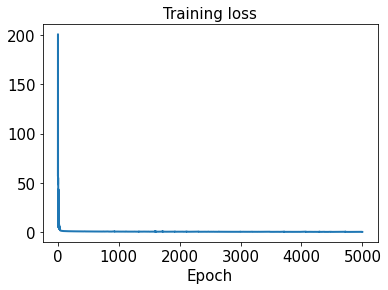

In [8]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

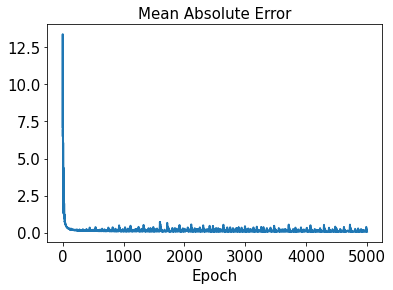

In [9]:
plt.plot(hist['mae'], lw=2)
plt.title('Mean Absolute Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [10]:
test_results = autoencoder.evaluate(x_test)

1/1 [==============================] - 0s 113ms/step - loss: 0.1179 - mae: 0.0000e+00 - mape: 0.0000e+00 - rmse: 0.0000e+00 - msle: 0.0000e+00


In [11]:
decoded_imgs = autoencoder.predict(x_test)

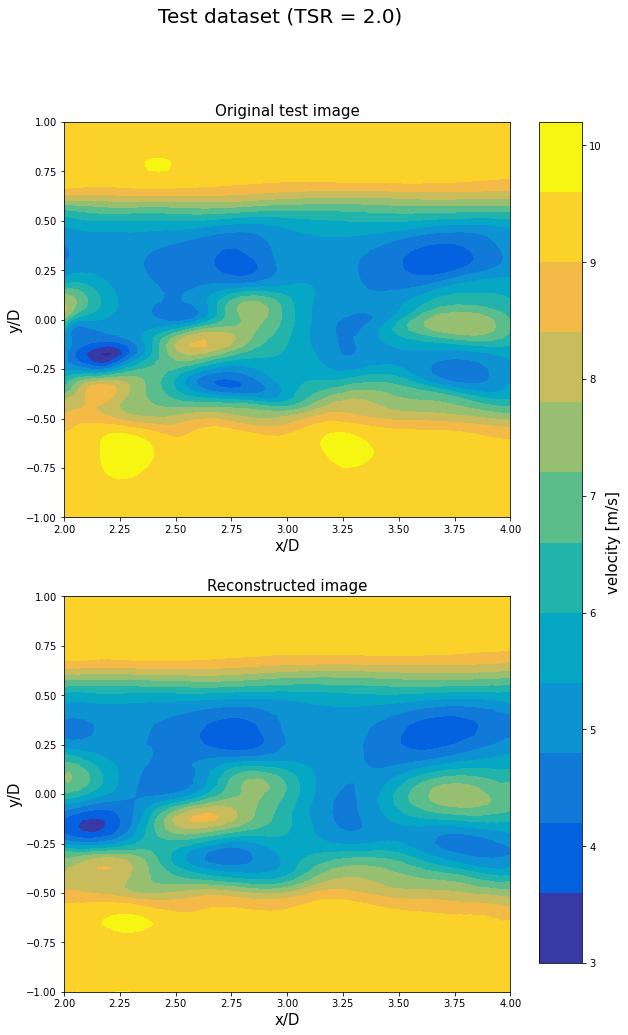

In [12]:
plt.figure(figsize=(8, 16))
xtest_rotate = x_test.T.reshape(100, 100)
decoded_rotate = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(2, 1, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, xtest_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(2, 1, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.075, 0.73])
cbar = plt.colorbar(a2, cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)
cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [13]:
error_test = np.abs(decoded_imgs - x_test) / x_test * 100
print(error_test)

[[[[6.3273287 ]
   [1.6016502 ]
   [0.72304183]
   ...
   [0.8156753 ]
   [2.2053888 ]
   [8.365307  ]]

  [[0.86225504]
   [0.15868315]
   [0.06192899]
   ...
   [0.12992077]
   [0.9118092 ]
   [1.1184814 ]]

  [[0.05397872]
   [0.04261963]
   [0.14581867]
   ...
   [1.1772907 ]
   [1.6725941 ]
   [1.048018  ]]

  ...

  [[0.51430345]
   [0.07824349]
   [0.17328466]
   ...
   [1.0533892 ]
   [1.613209  ]
   [1.7780136 ]]

  [[1.0816091 ]
   [1.0348037 ]
   [0.35479468]
   ...
   [0.40245718]
   [1.8605635 ]
   [1.8346485 ]]

  [[8.024655  ]
   [1.5055088 ]
   [0.06458062]
   ...
   [0.83078605]
   [1.2091585 ]
   [8.500791  ]]]]


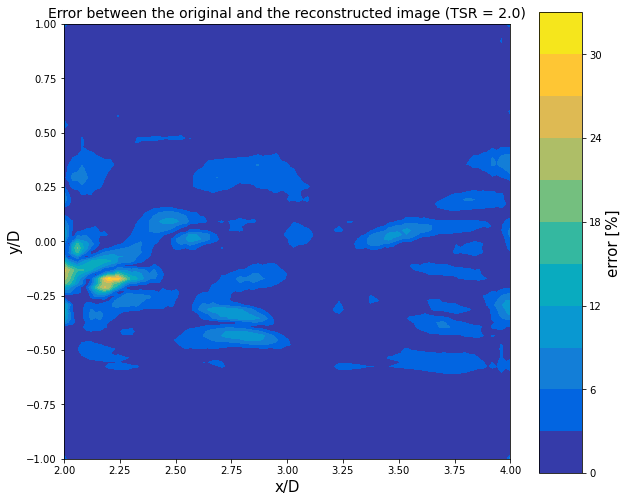

In [14]:
error_test_rotate = error_test.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 2.0)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

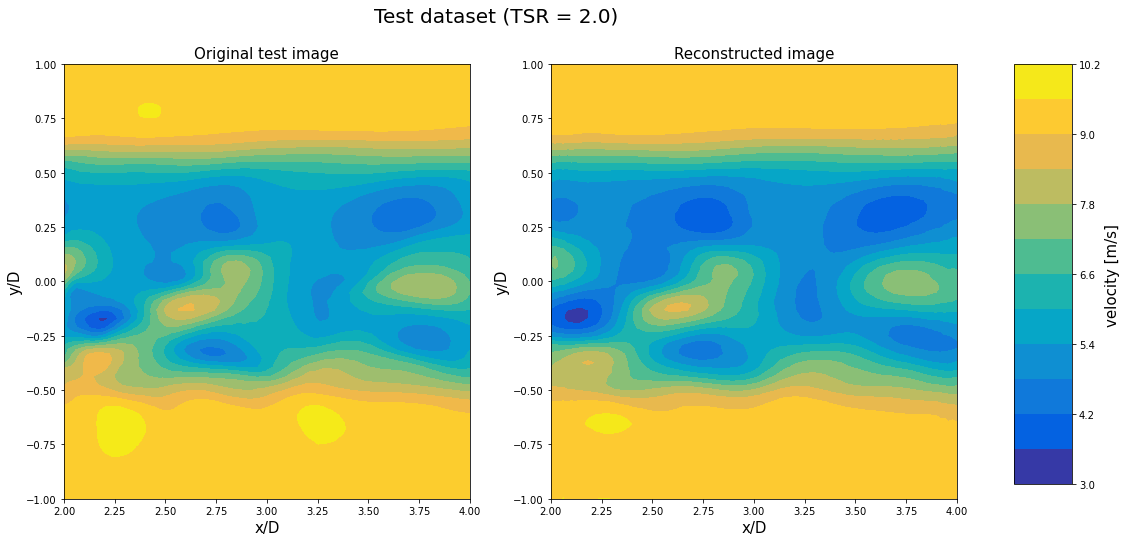

In [15]:
plt.figure(figsize=(16, 8))
xtest_rotate2 = x_test.T.reshape(100, 100)
decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, xtest_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, decoded_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [16]:
train0 = x_train[0].reshape(1, 100, 100, 1)
train_decode0 = autoencoder.predict(train0).reshape(100, 100)
print(train_decode0.shape)

(100, 100)


In [17]:
train0_orig = x_train[0].reshape(100, 100)

In [18]:
error_train0 = np.abs(train_decode0 - train0_orig) / train0_orig * 100

In [19]:
print(error_train0)

[[6.6636047  2.022796   1.2418468  ... 0.95117825 2.3544078  8.520138  ]
 [0.6236948  0.46904477 0.34394217 ... 0.04970021 1.0057853  1.240348  ]
 [0.09403091 0.245761   0.43809447 ... 1.2175561  1.7299212  1.1425805 ]
 ...
 [0.7221801  0.26522264 0.3143196  ... 1.2522815  1.8161902  2.0248976 ]
 [1.322146   0.81166697 0.16530658 ... 0.6722721  2.1194394  2.1405141 ]
 [7.798095   1.2512248  0.18679567 ... 1.1676602  1.5267972  8.81635   ]]


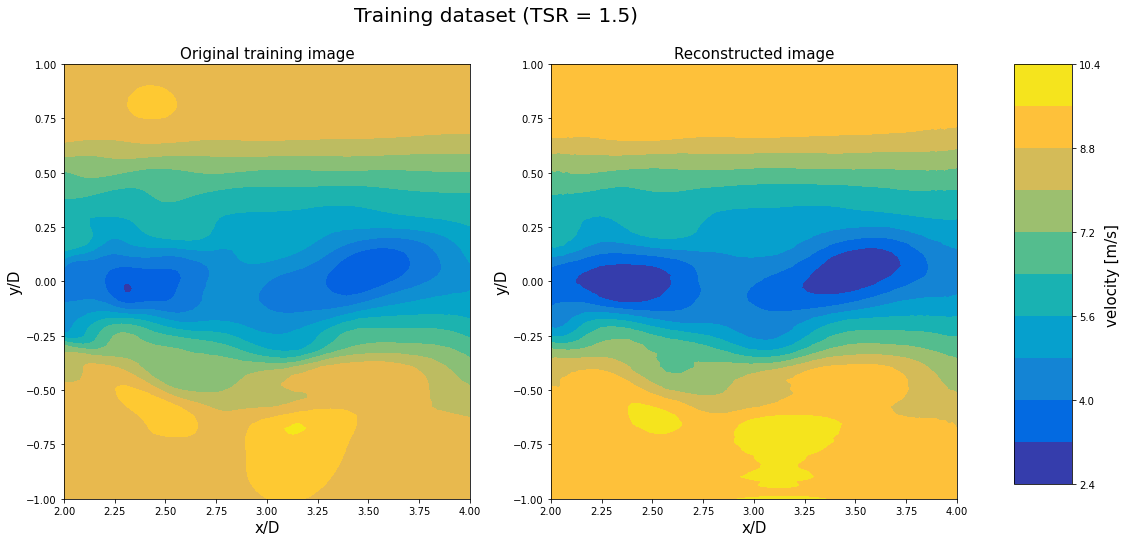

In [25]:
plt.figure(figsize=(16, 8))

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train0_orig, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original training image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train_decode0, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Training dataset (TSR = 1.5)',fontsize=20)
plt.show()

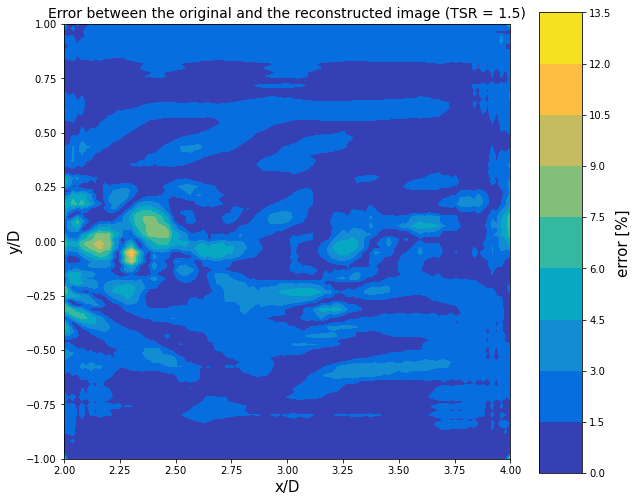

In [20]:
error_train0_rotate = error_train0.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train0_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 1.5)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

In [21]:
print(np.mean(error_train0))

1.6166666


In [22]:
print(np.max(error_train0))

12.209867


In [23]:
print(np.mean(error_test))

2.0315282


In [24]:
print(np.max(error_test))

30.150015
